# **PART 2**
Fine tune Classifiaction Layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical


In [ ]:
path='/content/drive/MyDrive/AIP/Assignment-1'
train_path=path+'/train_data'
test_path=path+'/test_data'
classnames=['American_Goldfinch',
  'Red_headed_Woodpecker',
  'Marigold',
  'anthuriam',
  'frangipani',
  'Albatross']
train_batches=tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=[x+'_train' for x in classnames],batch_size=20,shuffle=False)
test_batches=tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=[x+'_test' for x in classnames],batch_size=20,shuffle=False)

Found 240 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs,labels=next(train_batches)
plots(imgs,titles=labels)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


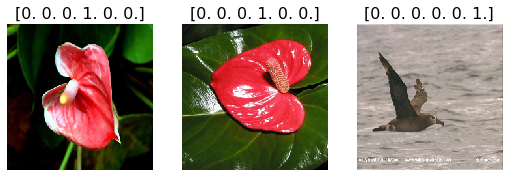

In [ ]:
plots(imgs[0:3],titles=labels[0:3])

In [ ]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
type(vgg16_model)

In [ ]:
model=tf.keras.models.Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

model.layers.pop()

for layer in model.layers:
  layer.trainable=False
model.summary()

In [ ]:
model.add(tf.keras.layers.Dense(6,activation='softmax'))
model.summary()

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_batches,steps_per_epoch=12,epochs=5,verbose=1)

Epoch 1/5
10/10 [==============================] - 102s 10s/step - loss: 1.7583 - accuracy: 0.4650
Epoch 2/5
10/10 [==============================] - 101s 10s/step - loss: 1.6670 - accuracy: 0.7950
Epoch 3/5
10/10 [==============================] - 116s 11s/step - loss: 1.5925 - accuracy: 0.8500
Epoch 4/5
10/10 [==============================] - 102s 10s/step - loss: 1.5153 - accuracy: 0.8800
Epoch 5/5
10/10 [==============================] - 100s 10s/step - loss: 1.4366 - accuracy: 0.8950


In [ ]:
print(model.history.history.keys())
print(model.history.history['loss'])
print(model.history.history['accuracy'])

dict_keys(['loss', 'accuracy'])
[1.7583385705947876, 1.6669727563858032, 1.5924806594848633, 1.515311598777771, 1.4366222620010376]
[0.4650000035762787, 0.7950000166893005, 0.8500000238418579, 0.8799999952316284, 0.8949999809265137]


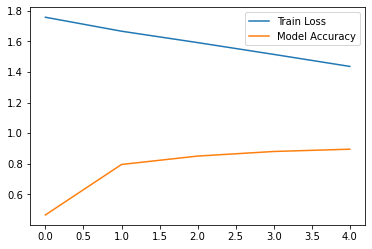

In [ ]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['accuracy'],label='Model Accuracy')
plt.legend()

In [ ]:
model.save(path+'/vgg16_model.h5')

In [ ]:
model=tf.keras.models.load_model(path+'/vgg16_model.h5')

In [ ]:
test_labels=np.zeros(shape=(120,1))

for i in range(0,6):
  test_labels[20*i:20*(i+1)]=i

test_labels=to_categorical(test_labels,num_classes=6)
print(test_labels.shape)
# print(test_labels[0])
# print(predictions[0,0])

# enc=OneHotEncoder(drop='second')
# enc.fit_transform(test_labels).toarray()
# #enc.transform(test).

(120, 6)


In [ ]:
predictions=model.predict(test_batches,steps=6,verbose=1)

6/6 [==============================] - 58s 10s/step


In [ ]:
test_batches.class_indices

{'Albatross_test': 5,
 'American_Goldfinch_test': 0,
 'Marigold_test': 2,
 'Red_headed_Woodpecker_test': 1,
 'anthuriam_test': 3,
 'frangipani_test': 4}

In [ ]:
pred_labels=np.argmax(predictions,axis=1)
test_labels=np.argmax(test_labels,axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.85      0.81      0.83        21
           2       0.85      0.89      0.87        19
           3       0.65      0.87      0.74        15
           4       0.95      0.70      0.81        27
           5       0.95      0.90      0.93        21

    accuracy                           0.84       120
   macro avg       0.84      0.85      0.84       120
weighted avg       0.86      0.84      0.84       120



In [ ]:
cm=confusion_matrix(test_batches.classes,pred_labels)
cm

array([[16,  3,  0,  0,  0,  1],
       [ 1, 17,  0,  0,  1,  1],
       [ 0,  0, 17,  2,  1,  0],
       [ 0,  0,  1, 13,  6,  0],
       [ 0,  0,  1,  0, 19,  0],
       [ 0,  1,  0,  0,  0, 19]])

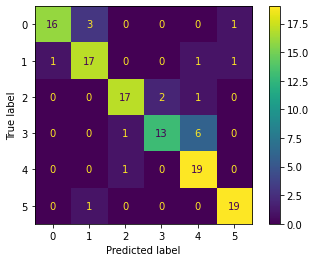

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
p=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2,3,4,5])
p.plot()
plt.show()

In [ ]:
classnames

['American_Goldfinch',
 'Red_headed_Woodpecker',
 'Marigold',
 'anthuriam',
 'frangipani',
 'Albatross']

In [ ]:
print(' Accuracy Of Model : ',np.sum((pred_labels-test_labels)==0)/len(test_labels))
i=0
print(' Accuracy in Class 0 (American_Goldfinch_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 1 (Red_headed_Woodpecker_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 2 (Marigold_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 3 (anthuriam_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 4 (frangipani_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)
i=i+20
print(' Accuracy in Class 5 (Albatross_train) : ',np.sum((pred_labels[i:i+20]-test_labels[i:i+20])==0)/20)

 Accuracy Of Model :  0.8416666666666667
 Accuracy in Class 0 (American_Goldfinch_train) :  0.8
 Accuracy in Class 1 (Red_headed_Woodpecker_train) :  0.85
 Accuracy in Class 2 (Marigold_train) :  0.85
 Accuracy in Class 3 (anthuriam_train) :  0.65
 Accuracy in Class 4 (frangipani_train) :  0.95
 Accuracy in Class 5 (Albatross_train) :  0.95
